In [1]:
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
%matplotlib inline

In [3]:
# set discount factor
β = 0.95

# Example 1

Given $k_{0}$, the objective function is

$$
\max_{\left\{ k_{t}\right\} _{t=1}^{\infty}}E_{0}\sum_{t=0}^{\infty}\beta^{t}r\left(s_{t},k_{t}\right)
$$

where the one-period payoff  function is

$$
r\left(s_{t},k_{t}\right)=f_{1}\left(s_{t}\right)k_{t}-f_{2}\left(s_{t}\right)k_{t}^{2}-d\left(s_{t}\right)\left(k_{t+1}-k_{t}\right)^{2},
$$

$E_0$ is a mathematical expectation conditioned on time $0$ information $x_0, s_0$

and the transition law for continous state variable $k_t$ is

$$
k_{t+1}-k_{t}=u_{t}.
$$

We can think of $k_t$ as the decision maker's capital and $u_t$ as costs of adjusting the
level of capital

We assume  that $f_{1}\left(s_{t}\right)>0$, $f_{2}\left(s_{t}\right)>0$, and $d\left(s_{t}\right)>0$. 

Denote the state transition matrix for Markov state $s_{t}\in\left\{ \bar{s}_{1},\bar{s}_{2}\right\}$ as $\Pi$:

$$
\Pr \left(s_{t+1}=\bar{s}_{j}\mid s_{t}=\bar{s}_{i}\right)=\Pi_{ij}.
$$

Let $x_{t}=\left[\begin{array}{c}
k_{t}\\
1
\end{array}\right]$

We can represent the one-period payoff function $r\left(s_{t},k_{t}\right)$ and the state-transition law as

$$
r\left(s_{t},k_{t}\right)	=f_{1}\left(s_{t}\right)k_{t}-f_{2}\left(s_{t}\right)k_{t}^{2}-d\left(s_{t}\right)u_{t}{}^{2} \\
	=-\left(x_{t}^{\prime}\underset{\equiv R\left(s_{t}\right)}{\underbrace{\left[\begin{array}{cc}
f_{2}\left(s_{t}\right) & -\frac{f_{1}\left(s_{t}\right)}{2}\\
-\frac{f_{1}\left(s_{t}\right)}{2} & 0
\end{array}\right]}}x_{t}+\underset{\equiv Q\left(s_{t}\right)}{\underbrace{d\left(s_{t}\right)}}u_{t}{}^{2}\right)
$$

$$
x_{t+1}=\left[\begin{array}{c}
k_{t+1}\\
1
\end{array}\right]=\underset{\equiv A\left(s_{t}\right)}{\underbrace{I_{2}}}x_{t}+\underset{\equiv B\left(s_{t}\right)}{\underbrace{\left[\begin{array}{c}
1\\
0
\end{array}\right]}}u_{t}
$$

In [4]:
def construct_arrays1(f1_vals=[1. ,1.],
                      f2_vals=[1., 1.],
                      d_vals=[1., 1.]):
    """
    Construct matrices that maps the problem described in example 1
    into a Markov jump linear quadratic dynamic programming problem.
    """
    
    # number of Markov states
    m = len(f1_vals)
    # number of state and control variables
    n, k = 2, 1
    
    # construct sets of matrices for each state
    As = [np.eye(n) for i in range(m)]
    Bs = [np.array([[1, 0]]).T for i in range(m)]
    
    Rs = np.zeros((m, n, n))
    Qs = np.zeros((m, k, k))

    for i in range(m):
        Rs[i, 0, 0] = f2_vals[i]
        Rs[i, 1, 0] = - f1_vals[i] / 2
        Rs[i, 0, 1] = - f1_vals[i] / 2
        
        Qs[i, 0, 0] = d_vals[i]

    Cs, Ns = None, None
    
    # compute the optimal k level of the payoff function in each state
    k_star = np.empty(m)
    for i in range(m):
        k_star[i] = f1_vals[i] / (2 * f2_vals[i])

    return Qs, Rs, Ns, As, Bs, Cs, k_star

The continuous part of the state $x_t$ consists of two variables, namely, $k_t$ and a constant term.

In [5]:
state_vec1 = ["k", "constant term"]

We start with a Markov transition matrix that makes the Markov state be  strictly periodic: 

$$
\Pi_{1}=\left[\begin{array}{cc}
0 & 1\\
1 & 0
\end{array}\right],
$$

We  set $f_1(s_t)$ and $f_2(s_t)$ to be  independent of the Markov state $s_t$

$$
f_1(\bar{s_1})=f_1(\bar{s_2})=1,
$$

$$
f_2(\bar{s_1})=f_2(\bar{s_2})=1.
$$

In contrast to $f_1(s_t)$ and $f_2(s_t)$, we make the adjustment cost $d(s_t)$ vary  across Markov states $s_t$. 

We the adjustment cost to be lower in Markov state  $\bar{s}_2$ 

$$
d(\bar{s_1})=1, d(\bar{s_2})=0.5.
$$

The following code forms a Markov switching LQ problem and computes the optimal value functions and optimal decision rules for each Markov state

In [6]:
# construct Markov transition matrix
Π1 = np.array([[0., 1.],
               [1., 0.]]) 

In [7]:
# construct matrices
Qs, Rs, Ns, As, Bs, Cs, k_star = construct_arrays1(d_vals=[1., 0.5])

In [8]:
# construct a Markov Jump LQ problem
ex1_a = qe.LQMarkov(Π1, Qs, Rs, As, Bs, Cs=Cs, Ns=Ns, beta=β)
# solve for optimal value functions and decision rules
ex1_a.stationary_values();

Let's look at the value function matrices and the decision rules for each Markov state

In [9]:
# P(s)
ex1_a.Ps

array([[[ 1.56626026, -0.78313013],
        [-0.78313013, -4.60843493]],

       [[ 1.37424214, -0.68712107],
        [-0.68712107, -4.65643947]]])

In [10]:
# d(s) = 0, since there is no randomness
ex1_a.ds

array([0., 0.])

In [11]:
# F(s)
ex1_a.Fs

array([[[ 0.56626026, -0.28313013]],

       [[ 0.74848427, -0.37424214]]])

Now we'll plot the decision rules and see if they make sense

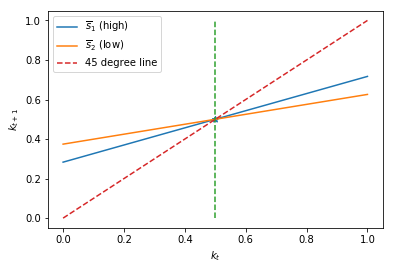

In [12]:
# Plot the optimal decision rules
k_grid = np.linspace(0., 1., 100)
# optimal choice in state s1
u1_star = - ex1_a.Fs[0, 0, 1] - ex1_a.Fs[0, 0, 0] * k_grid
# optimal choice in state s2
u2_star = - ex1_a.Fs[1, 0, 1] - ex1_a.Fs[1, 0, 0] * k_grid

plt.plot(k_grid, k_grid + u1_star, label="$\overline{s}_1$ (high)")
plt.plot(k_grid, k_grid + u2_star, label="$\overline{s}_2$ (low)")

# the optimal k*
plt.scatter([0.5, 0.5], [0.5, 0.5], marker="*")
plt.plot([k_star[0], k_star[0]], [0., 1.0], '--')

# 45 degree line
plt.plot([0., 1.], [0., 1.], '--', label="45 degree line")

plt.xlabel("$k_t$")
plt.ylabel("$k_{t+1}$")
plt.legend()

The above graph plots $k_{t+1}= k_t + u_t = k_t - F x_t $ as an affine (i.e., linear in $k_t$ plus a constant) function of $k_t$ for both Markov states $s_t$.

It also plots the 45 degree line.

Notice that the two $s_t$-dependent *closed loop* functions that determine $k_{t+1}$ as  functions of $k_t$ share the same rest point
(also called a fixed point) at $k_t = .5$

Evidently, the  optimal decision rule in Markov state $\bar{s}_2$, in which the  adjustment cost is lower, makes $k_{t+1}$ a flatter function of $k_t$ in Markov state $\bar{s}_2$ 

This happens because when $k_t$ is not at its fixed point, $\left| u_t(\bar{s}_2)\right| > \left| u_t(\bar{s}_1)\right|$, so that the decision maker adjusts toward the fixed point faster  when when the Markov state $s_t$ takes a value that makes it cheaper

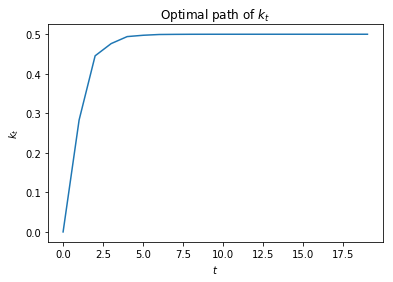

In [13]:
# compute time series
T = 20
x0 = np.array([[0., 1.]]).T
x_path = ex1_a.compute_sequence(x0, ts_length=T)[0]

plt.plot(range(T), x_path[0, :-1])
plt.xlabel("$t$")
plt.ylabel("$k_t$")
plt.title("Optimal path of $k_t$")
plt.show()

Now we'll depart from the preceding transition matrix that made the Markov state be strictly periodic

We'll begin with symmetric transition matrices of the form

$$
\Pi_{2}=\left[\begin{array}{cc}
1-\lambda & \lambda\\
\lambda & 1-\lambda
\end{array}\right].
$$

In [14]:
λ = 0.8 # high λ
Π2 = np.array([[1-λ, λ],
               [λ, 1-λ]])

ex1_b = qe.LQMarkov(Π2, Qs, Rs, As, Bs, Cs=Cs, Ns=Ns, beta=β)
ex1_b.stationary_values();
ex1_b.Fs

array([[[ 0.57291724, -0.28645862]],

       [[ 0.74434525, -0.37217263]]])

In [15]:
λ = 0.2 # low λ
Π2 = np.array([[1-λ, λ],
               [λ, 1-λ]])

ex1_b = qe.LQMarkov(Π2, Qs, Rs, As, Bs, Cs=Cs, Ns=Ns, beta=β)
ex1_b.stationary_values();
ex1_b.Fs

array([[[ 0.59533259, -0.2976663 ]],

       [[ 0.72818728, -0.36409364]]])

We can plot optimal decision rules associated with  different $\lambda$ values.

In [16]:
λ_vals = np.linspace(0., 1., 10)
F1 = np.empty((λ_vals.size, 2))
F2 = np.empty((λ_vals.size, 2))

for i, λ in enumerate(λ_vals):
    Π2 = np.array([[1-λ, λ],
                   [λ, 1-λ]])

    ex1_b = qe.LQMarkov(Π2, Qs, Rs, As, Bs, Cs=Cs, Ns=Ns, beta=β)
    ex1_b.stationary_values();
    F1[i, :] = ex1_b.Fs[0, 0, :]
    F2[i, :] = ex1_b.Fs[1, 0, :]

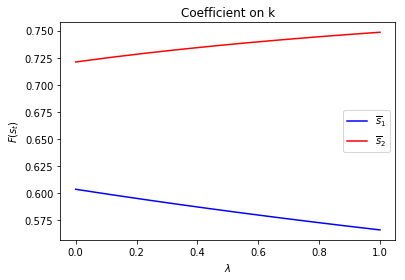

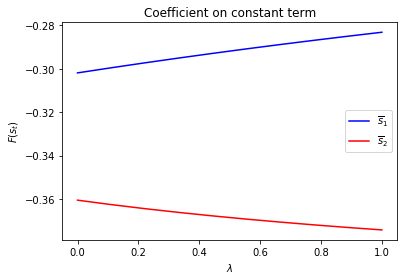

In [17]:
for i, state_var in enumerate(state_vec1):
    plt.plot(λ_vals, F1[:, i], label="$\overline{s}_1$", color="b")
    plt.plot(λ_vals, F2[:, i], label="$\overline{s}_2$", color="r")

    plt.xlabel("$\lambda$")
    plt.ylabel("$F(s_t)$")
    plt.title(f"Coefficient on {state_var}")
    plt.legend()
    plt.show()

Notice  how the decision rules' constants and slopes behave as functions of $\lambda$

Evidently,  as the Markov chain becomes
*more  nearly periodic* (i.e., as $\lambda \rightarrow 1$), the dynamic program adjusts capital faster in the low adjustment cost Markov state  to take advantage of  what  is only temporarily a more favorable time to invest. 

Now let's study situations in which the Markov transition matrix $\Pi$ is  asymmetric

$$
\Pi_{3}=\left[\begin{array}{cc}
1-\lambda & \lambda\\
\delta & 1-\delta
\end{array}\right].
$$

In [18]:
λ, δ = 0.8, 0.2
Π3 = np.array([[1-λ, λ],
               [δ, 1-δ]])

ex1_b = qe.LQMarkov(Π3, Qs, Rs, As, Bs, Cs=Cs, Ns=Ns, beta=β)
ex1_b.stationary_values();
ex1_b.Fs

array([[[ 0.57169781, -0.2858489 ]],

       [[ 0.72749075, -0.36374537]]])

We can plot optimal decision rules for different $\lambda$ and $\delta$ values.

In [19]:
λ_vals = np.linspace(0., 1., 10)
δ_vals = np.linspace(0., 1., 10)

λ_grid = np.empty((λ_vals.size, δ_vals.size))
δ_grid = np.empty((λ_vals.size, δ_vals.size))
F1_grid = np.empty((λ_vals.size, δ_vals.size, len(state_vec1)))
F2_grid = np.empty((λ_vals.size, δ_vals.size, len(state_vec1)))

for i, λ in enumerate(λ_vals):
    λ_grid[i, :] = λ
    δ_grid[i, :] = δ_vals
    for j, δ in enumerate(δ_vals):
        Π3 = np.array([[1-λ, λ],
                       [δ, 1-δ]])

        ex1_b = qe.LQMarkov(Π3, Qs, Rs, As, Bs, Cs=Cs, Ns=Ns, beta=β)
        ex1_b.stationary_values();
        F1_grid[i, j, :] = ex1_b.Fs[0, 0, :]
        F2_grid[i, j, :] = ex1_b.Fs[1, 0, :]

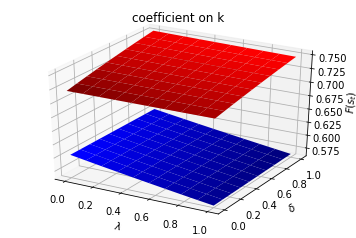

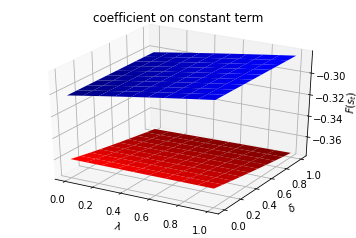

In [20]:
for i, state_var in enumerate(state_vec1):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # high adjustment cost, blue surface
    ax.plot_surface(λ_grid, δ_grid, F1_grid[:, :, i], color="b")
    # low adjustment cost, red surface
    ax.plot_surface(λ_grid, δ_grid, F2_grid[:, :, i], color="r")
    ax.set_xlabel("$\lambda$")
    ax.set_ylabel("$\delta$")
    ax.set_zlabel("$F(s_t)$")
    ax.set_title(f"coefficient on {state_var}")
    plt.show()

The following code defined a wrapper function that computes optimal decision rules for cases with different Markov transition matrices 

In [21]:
def run(construct_func, vals_dict, state_vec):
    """
    A Wrapper function that repeat the computation above,
    for different cases.
    """
    
    Qs, Rs, Ns, As, Bs, Cs, k_star = construct_func(**vals_dict)
    
    # symmetric Π
    # notice that pure periodic transition is a special case
    # when λ=1. 
    print("symmetric Π case:\n")
    λ_vals = np.linspace(0., 1., 10)
    F1 = np.empty((λ_vals.size, len(state_vec)))
    F2 = np.empty((λ_vals.size, len(state_vec)))

    for i, λ in enumerate(λ_vals):
        Π2 = np.array([[1-λ, λ],
                       [λ, 1-λ]])

        mplq = qe.LQMarkov(Π2, Qs, Rs, As, Bs, Cs=Cs, Ns=Ns, beta=β)
        mplq.stationary_values();
        F1[i, :] = mplq.Fs[0, 0, :]
        F2[i, :] = mplq.Fs[1, 0, :]
    
    for i, state_var in enumerate(state_vec):
        plt.figure()
        plt.plot(λ_vals, F1[:, i], label="$\overline{s}_1$", color="b")
        plt.plot(λ_vals, F2[:, i], label="$\overline{s}_2$", color="r")

        plt.xlabel("$\lambda$")
        plt.ylabel("$F(\overline{s}_t)$")
        plt.title(f"coefficient on {state_var}")
        plt.legend()
        plt.show()
        
    # plot optimal k*(s_t) and k that optimal policies are targeting
    # only for example 1
    if state_vec == ["k", "constant term"]:
        plt.figure()
        for i in range(2):
            F = [F1, F2][i]
            c = ["b", "r"][i]
            plt.plot([0, 1], [k_star[i], k_star[i]], "--", color=c, label="$k^*(\overline{s}_"+str(i+1)+")$")
            # k + (- Fk * k - Fc) = k
            # k = - Fc / Fk
            plt.plot(λ_vals, - F[:, 1] / F[:, 0], color=c, label="$k^{target}(\overline{s}_"+str(i+1)+")$")
            
        # plot a vertical line at λ=0.5
        plt.plot([0.5, 0.5], [min(k_star), max(k_star)], "-.")

        plt.xlabel("$\lambda$")
        plt.ylabel("$k$")
        plt.title("Optimal k levels and k targets")
        plt.text(0.5, min(k_star)+(max(k_star)-min(k_star))/20, "$\lambda=0.5$")
        plt.legend(bbox_to_anchor=(1., 1.))
        plt.show()

    # asymmetric Π
    print("asymmetric Π case:\n")
    δ_vals = np.linspace(0., 1., 10)

    λ_grid = np.empty((λ_vals.size, δ_vals.size))
    δ_grid = np.empty((λ_vals.size, δ_vals.size))
    F1_grid = np.empty((λ_vals.size, δ_vals.size, len(state_vec)))
    F2_grid = np.empty((λ_vals.size, δ_vals.size, len(state_vec)))

    for i, λ in enumerate(λ_vals):
        λ_grid[i, :] = λ
        δ_grid[i, :] = δ_vals
        for j, δ in enumerate(δ_vals):
            Π3 = np.array([[1-λ, λ],
                           [δ, 1-δ]])

            mplq = qe.LQMarkov(Π3, Qs, Rs, As, Bs, Cs=Cs, Ns=Ns, beta=β)
            mplq.stationary_values();
            F1_grid[i, j, :] = mplq.Fs[0, 0, :]
            F2_grid[i, j, :] = mplq.Fs[1, 0, :]
    
    for i, state_var in enumerate(state_vec):    
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(λ_grid, δ_grid, F1_grid[:, :, i], color="b")
        ax.plot_surface(λ_grid, δ_grid, F2_grid[:, :, i], color="r")
        ax.set_xlabel("$\lambda$")
        ax.set_ylabel("$\delta$")
        ax.set_zlabel("$F(\overline{s}_t)$")
        ax.set_title(f"coefficient on {state_var}")
        plt.show()

To illustrate the code with another example, we shall set $f_2(s_t)$ and $d(s_t)$ as constant functions and

$$
f_1(\bar{s}_1) = 0.5, f_1(\bar{s}_2) = 1
$$

Thus, the sole role of the Markov jump state $s_t$ is to indentify times in which capital
is very productive and other times in which it is less productive

The example below reveals much about  the structure of the optimum problem and optimal policies

  
Only $f_1(s_t)$ varies with  $s_t$

So there are different  $s_t$-dependent  optimal static $k$ level in different states $k^*(s_t)=\frac{f_1(s_t)}{2 f_2(s_t)}$, values of $k$ that maximize  one-period payoff functions in each state

We denote a target $k$ level  as $k^{target}(s_t)$,  the fixed point of the optimal policies in each state, given the value of $\lambda$. 

We call $k^{target}(s_t)$ a "target" because in each Markov state $s_t$, optimal policies are contraction mappings and will push $k_t$ towards a fixed point $k^{target}(s_t)$ 

When $\lambda \rightarrow 0$, each Markov state becomes close to absorbing state
and cosequently $k^{target}(s_t) \rightarrow k^*(s_t)$. 

But when $\lambda \rightarrow 1$, the Markov transition matrix becomes more nearly periodic, so the optimum decision rules  target more at the optimal k level in the other state in order to enjoy higher expected payoff  in the next period

The switch happens at $\lambda = 0.5$ when both states are equally likely to be reached
      
      
Below we plot an additional figure that shows  optimal $k$ levels in the  two states Markov
jump state  and also how the targeted $k$ levels change as $\lambda$ changes



symmetric Π case:



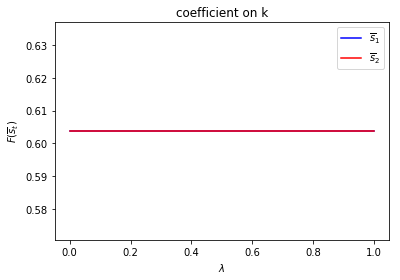

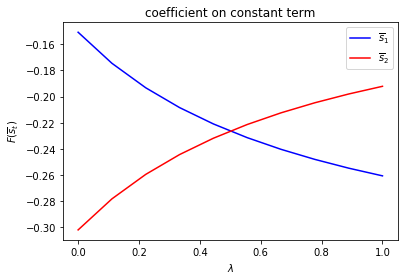

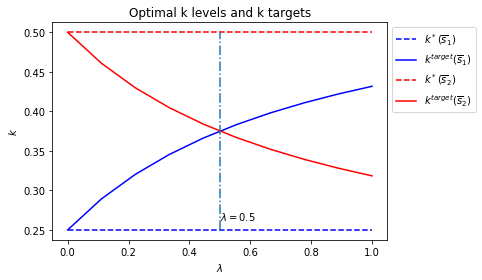

asymmetric Π case:



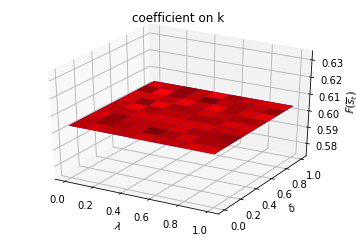

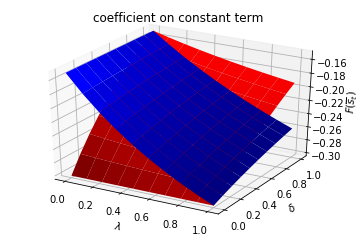

In [22]:
run(construct_arrays1, {"f1_vals":[0.5, 1.]}, state_vec1)

### d

Set $f_1(s_t)$ and $d(s_t)$ as constant functions and

$$
f_2(\bar{s}_1) = 0.5, f_2(\bar{s}_2) = 1.
$$

symmetric Π case:



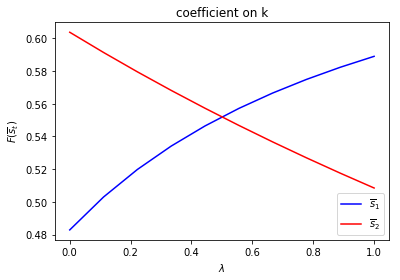

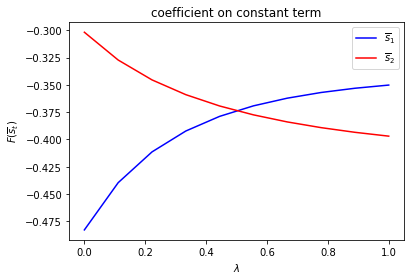

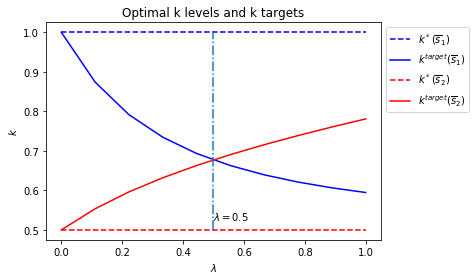

asymmetric Π case:



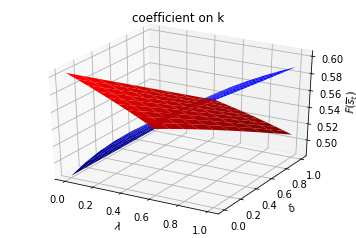

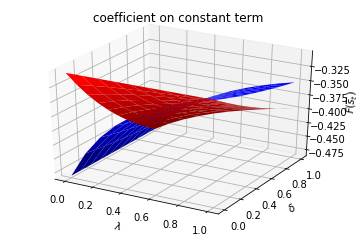

In [23]:
run(construct_arrays1, {"f2_vals":[0.5, 1.]}, state_vec1)

# Example 2

We now  add to the example 1 setup  another state variable $w_t$ that follows the evolution law 

$$
w_{t+1}=\alpha_{0}\left(s_{t}\right)+\rho\left(s_{t}\right)w_{t}+\sigma\left(s_{t}\right)\epsilon_{t+1},\quad\epsilon_{t+1}\sim N\left(0,1\right).
$$

We think of $w_t$ as a rental rate or tax rate that the decision maker pays each period for $k_t$ 

To capture this idea, we add to the decision maker's  one-period payoff  function the product of  $w_t$ and $k_t$

$$
r\left(s_{t},k_{t},w_{t}\right)=f_{1}\left(s_{t}\right)k_{t}-f_{2}\left(s_{t}\right)k_{t}^{2}-d\left(s_{t}\right)\left(k_{t+1}-k_{t}\right)^{2}-w_{t}k_{t},
$$

We now let the continuous part of the state at time $t$ be  $x_{t}=\left[\begin{array}{c}
k_{t}\\
1\\
w_{t}
\end{array}\right]$ and continue to set the control $u_{t}=k_{t+1}-k_{t}$

We can write the one-period payoff  function $r\left(s_{t},k_{t},w_{t}\right)$ and the state-transition law as

$$
r\left(s_{t},k_{t},w_{t}\right)	=f_{1}\left(s_{t}\right)k_{t}-f_{2}\left(s_{t}\right)k_{t}^{2}-d\left(s_{t}\right)\left(k_{t+1}-k_{t}\right)^{2}-w_{t}k_{t} \\
	=-\left(x_{t}^{\prime}\underset{\equiv R\left(s_{t}\right)}{\underbrace{\left[\begin{array}{ccc}
f_{2}\left(s_{t}\right) & -\frac{f_{1}\left(s_{t}\right)}{2} & \frac{1}{2}\\
-\frac{f_{1}\left(s_{t}\right)}{2} & 0 & 0\\
\frac{1}{2} & 0 & 0
\end{array}\right]}}x_{t}+\underset{\equiv Q\left(s_{t}\right)}{\underbrace{d\left(s_{t}\right)}}u_{t}^{2}\right),
$$

and

$$
x_{t+1}=\left[\begin{array}{c}
k_{t+1}\\
1\\
w_{t+1}
\end{array}\right]=\underset{\equiv A\left(s_{t}\right)}{\underbrace{\left[\begin{array}{ccc}
1 & 0 & 0\\
0 & 1 & 0\\
0 & \alpha_{0}\left(s_{t}\right) & \rho\left(s_{t}\right)
\end{array}\right]}}x_{t}+\underset{\equiv B\left(s_{t}\right)}{\underbrace{\left[\begin{array}{c}
1\\
0\\
0
\end{array}\right]}}u_{t}+\underset{\equiv C\left(s_{t}\right)}{\underbrace{\left[\begin{array}{c}
0\\
0\\
\sigma\left(s_{t}\right)
\end{array}\right]}}\epsilon_{t+1}.
$$

In [24]:
def construct_arrays2(f1_vals=[1. ,1.],
                      f2_vals=[1., 1.],
                      d_vals=[1., 1.],
                      α0_vals=[1., 1.],
                      ρ_vals=[0.9, 0.9],
                      σ_vals=[1., 1.]):
    """
    Construct matrices that maps the problem described in example 2
    into a Markov jump linear quadratic dynamic programming problem.
    """
    
    m = len(f1_vals)
    n, k, j = 3, 1, 1

    Rs = np.zeros((m, n, n))
    Qs = np.zeros((m, k, k))
    As = np.zeros((m, n, n))
    Bs = np.zeros((m, n, k))
    Cs = np.zeros((m, n, j))

    for i in range(m):
        Rs[i, 0, 0] = f2_vals[i]
        Rs[i, 1, 0] = - f1_vals[i] / 2
        Rs[i, 0, 1] = - f1_vals[i] / 2
        Rs[i, 0, 2] = 1/2
        Rs[i, 2, 0] = 1/2
        
        Qs[i, 0, 0] = d_vals[i]
        
        As[i, 0, 0] = 1
        As[i, 1, 1] = 1
        As[i, 2, 1] = α0_vals[i]
        As[i, 2, 2] = ρ_vals[i]
        
        Bs[i, :, :] = np.array([[1, 0, 0]]).T
        
        Cs[i, :, :] = np.array([[0, 0, σ_vals[i]]]).T
    
    Ns = None
    k_star = None

    return Qs, Rs, Ns, As, Bs, Cs, k_star

In [25]:
state_vec2 = ["k", "constant term", "w"]

### a

Only $d(s_t)$ depends on $s_t$.

symmetric Π case:



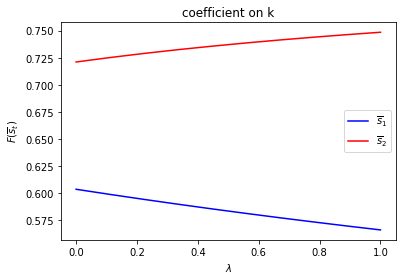

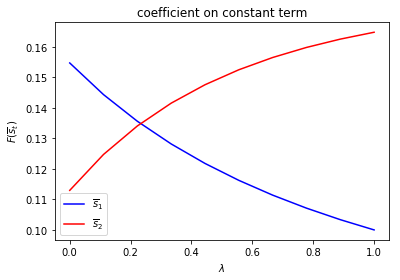

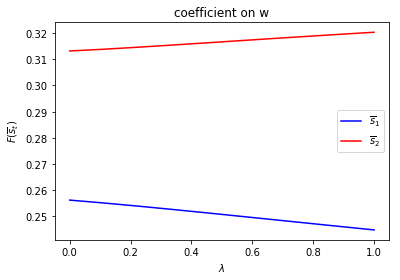

asymmetric Π case:



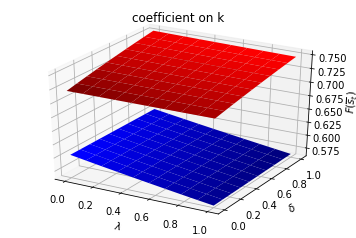

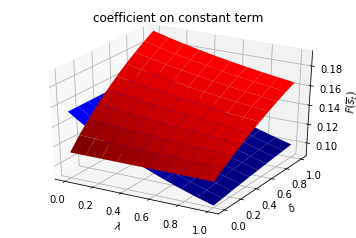

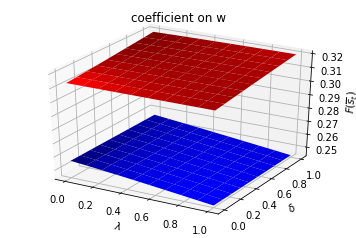

In [26]:
run(construct_arrays2, {"d_vals":[1., 0.5]}, state_vec2)

### b

Only $f_1(s_t)$ depends on $s_t$.

symmetric Π case:



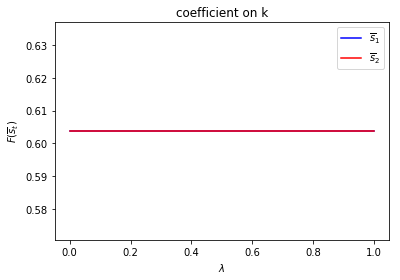

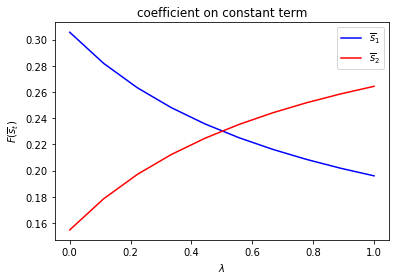

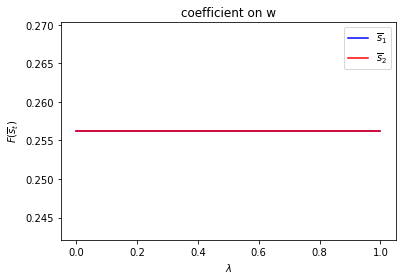

asymmetric Π case:



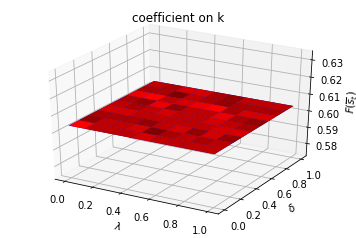

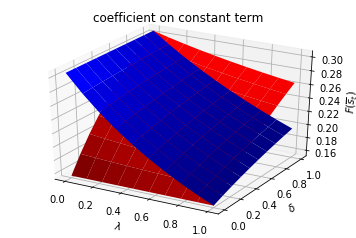

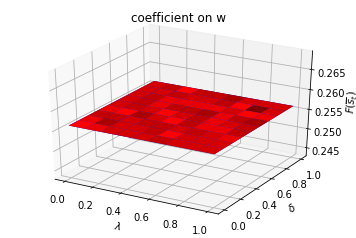

In [27]:
run(construct_arrays2, {"f1_vals":[0.5, 1.]}, state_vec2)

### c

Only $f_2(s_t)$ depends on $s_t$.

symmetric Π case:



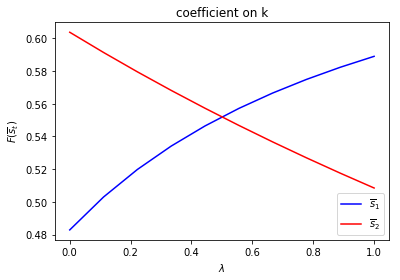

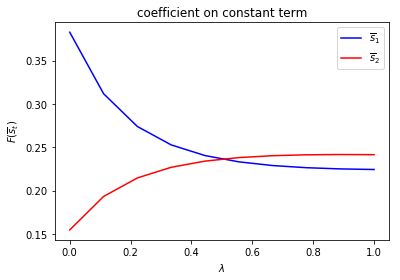

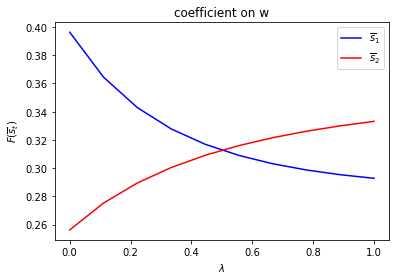

asymmetric Π case:



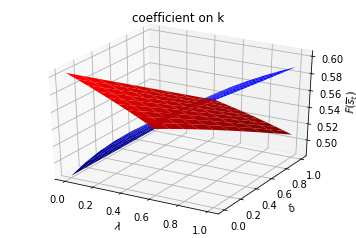

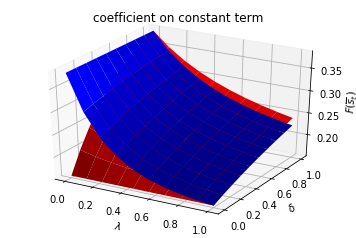

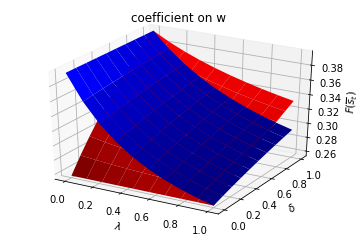

In [28]:
run(construct_arrays2, {"f2_vals":[0.5, 1.]}, state_vec2)

### d

Only $\alpha_0(s_t)$ depends on $s_t$.

symmetric Π case:



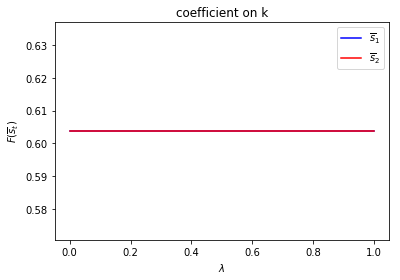

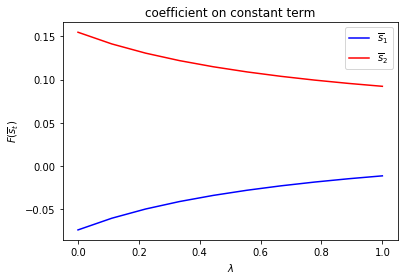

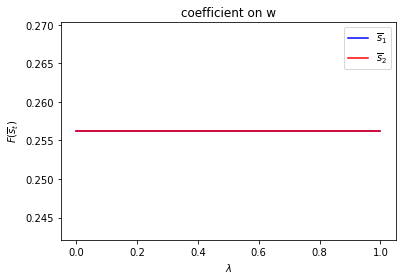

asymmetric Π case:



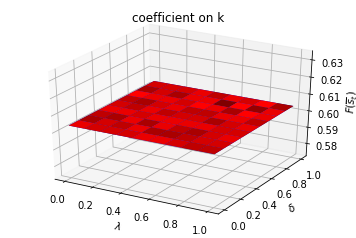

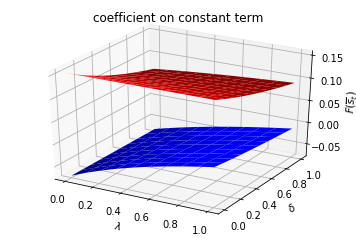

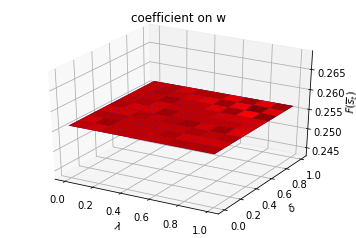

In [29]:
run(construct_arrays2, {"α0_vals":[0.5, 1.]}, state_vec2)

### e

Only $\rho(s_t)$ depends on $s_t$.

symmetric Π case:



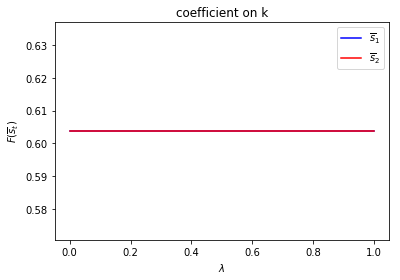

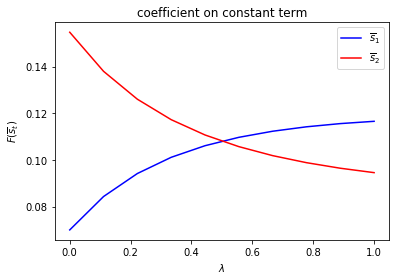

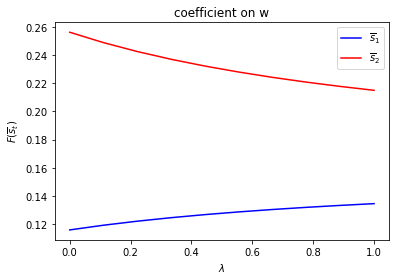

asymmetric Π case:



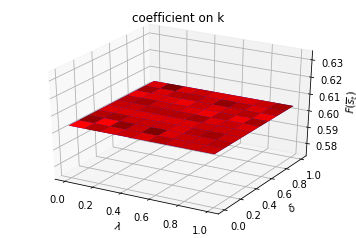

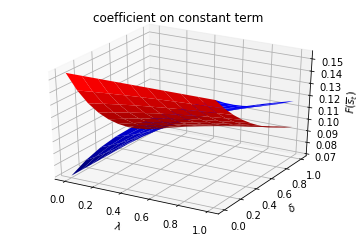

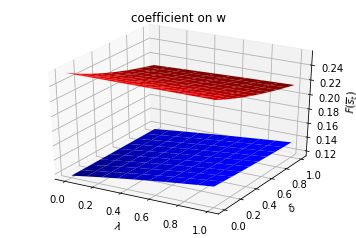

In [30]:
run(construct_arrays2, {"ρ_vals":[0.5, 0.9]}, state_vec2)

### f

Only $\sigma(s_t)$ depends on $s_t$.

symmetric Π case:



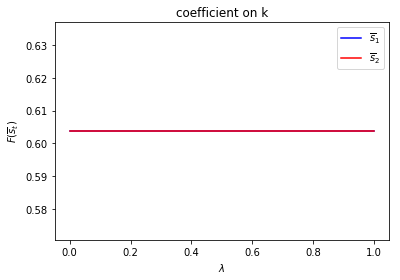

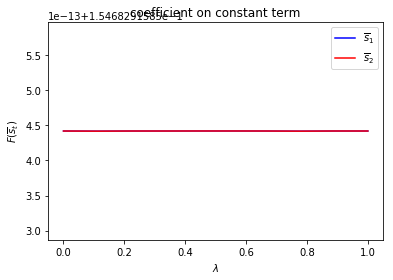

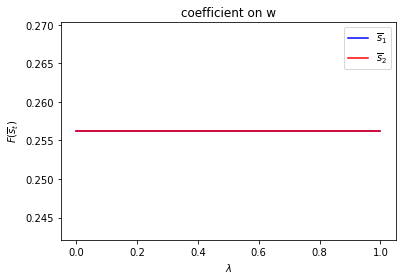

asymmetric Π case:



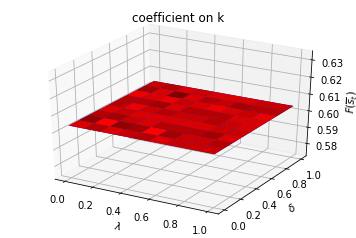

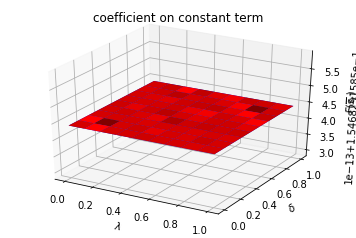

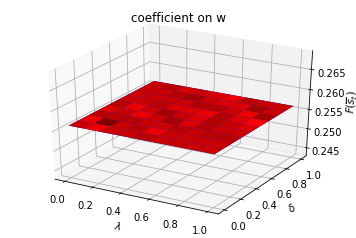

In [31]:
run(construct_arrays2, {"σ_vals":[0.5, 1.]}, state_vec2)